# Case Study : Classificaiton of Image

In [ ]:
# importing reequird library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
cifar10 = tf.keras.datasets.cifar10

In [ ]:
# distributing data into test and train set
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print(train_images.shape, train_labels.shape, train_images.shape, test_labels.shape, )

(50000, 32, 32, 3) (50000, 1) (50000, 32, 32, 3) (10000, 1)


- Here 50000 : images
        32 * 32  : size of image ( height * width)
        3 : channels (Red, Green, Blue)
        

In [ ]:
# reducing the pixel size for easily model track and training of model
x_train, x_test = train_images / 255.0, test_images / 255.0

# flatten the label values
y_train, y_test = train_labels.flatten(), test_labels.flatten()

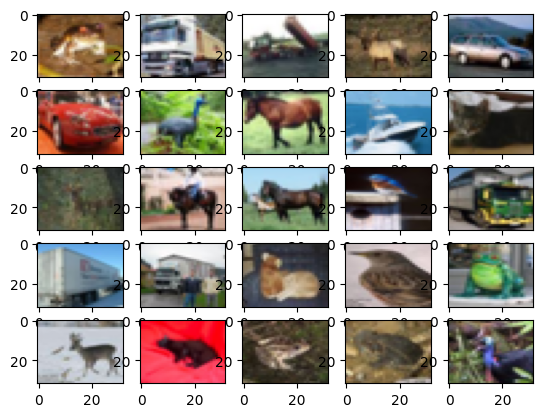

In [ ]:
# visualizing some images
fig, ax = plt.subplots(5,5)
k=0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect="auto")
        k += 1
plt.show()

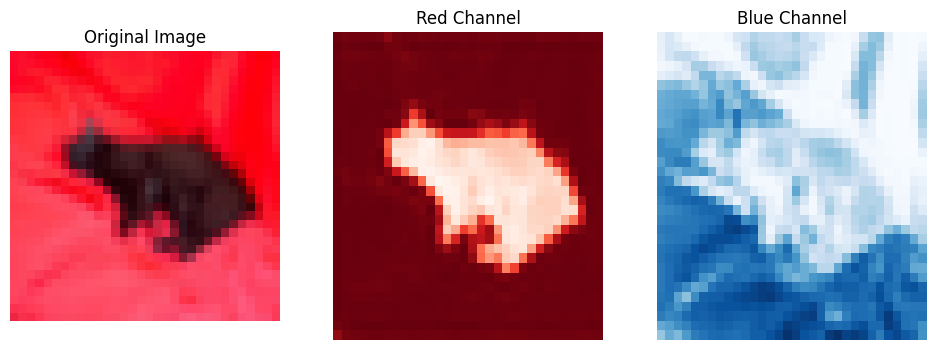

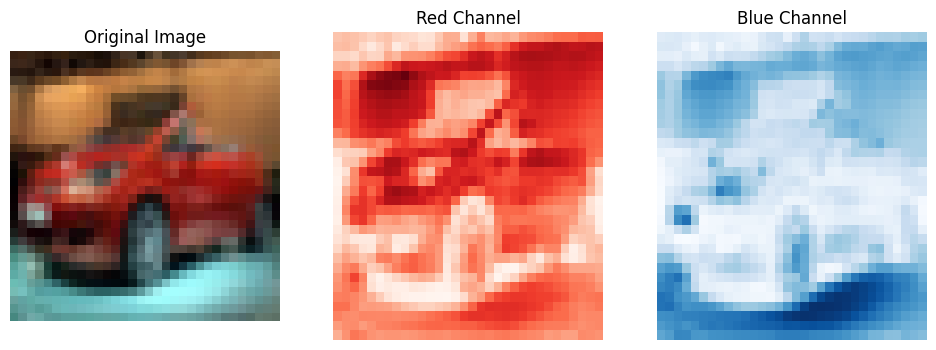

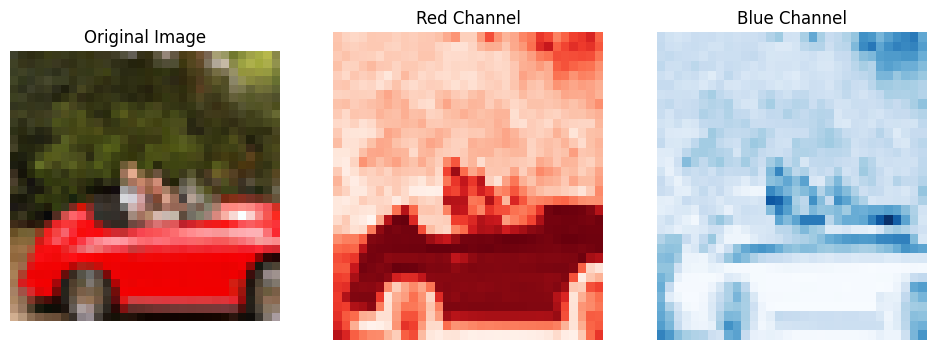

In [ ]:
# seperating the channels for sample images 21,45,99
images_indices = [21,45,99]

for i in range(len(images_indices)):
  image_array = train_images[images_indices[i]]

  #plotting different channels
  plt.figure(figsize=(16,4))

  #original images
  plt.subplot(1,4,1)
  plt.imshow(image_array, cmap=plt.cm.binary)
  plt.axis("off")
  plt.title("Original Image")

  # red channel
  plt.subplot(1,4,2)
  sns.heatmap(image_array[:,:,0],cmap='Reds',cbar=False)
  plt.axis('off')
  plt.title("Red Channel")

  # green channel
  plt.subplot(1,4,3)
  sns.heatmap(image_array[:,:,1], cmap="Greens", cbar=False)
  plt.axis('off')
  plt.title("Green Channel")

  # blue channel
  plt.subplot(1,4,3)
  sns.heatmap(image_array[:,:,1], cmap="Blues", cbar=False)
  plt.axis('off')
  plt.title("Blue Channel")

  plt.show()


In [ ]:
# number of unique labels
cla = len(set(y_train))
print("Number of classes : ",cla)

Number of classes :  10


## Creating cnn

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation,MaxPooling2D,Dropout, GlobalMaxPooling2D

In [ ]:
# defining the model
model = Sequential()

# adding layers to the model

#1st Conv block => 2 conv layers + 1 pooling layer
model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu" , input_shape=(32,32,3)))
model.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd conv block => 2 conv layers + 1 pooling layer
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd conv block => 2 conv layers + 1 pooling layer
model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten and Fully Connected layer
model.add(Flatten())
model.add(Dense(512, activation="relu"))

# Output Layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
# compile the model

model.compile(optimizer="adam",
                     loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [ ]:
# fit the model
history = model.fit(x_train, y_train,
          epochs=10,
          batch_size=150,
          validation_data=(x_test, y_test)
)
history

Epoch 1/10
334/334 [==============================] - 7s 16ms/step - loss: 1.5652 - accuracy: 0.4233 - val_loss: 1.2124 - val_accuracy: 0.5645
Epoch 2/10
334/334 [==============================] - 5s 14ms/step - loss: 1.0138 - accuracy: 0.6426 - val_loss: 0.9512 - val_accuracy: 0.6742
Epoch 3/10
334/334 [==============================] - 5s 16ms/step - loss: 0.7885 - accuracy: 0.7218 - val_loss: 0.8220 - val_accuracy: 0.7145
Epoch 4/10
334/334 [==============================] - 5s 14ms/step - loss: 0.6400 - accuracy: 0.7753 - val_loss: 0.6812 - val_accuracy: 0.7671
Epoch 5/10
334/334 [==============================] - 5s 15ms/step - loss: 0.5210 - accuracy: 0.8170 - val_loss: 0.7703 - val_accuracy: 0.7472
Epoch 6/10
334/334 [==============================] - 5s 14ms/step - loss: 0.4195 - accuracy: 0.8536 - val_loss: 0.6873 - val_accuracy: 0.7763
Epoch 7/10
334/334 [==============================] - 5s 14ms/step - loss: 0.3200 - accuracy: 0.8875 - val_loss: 0.7140 - val_accuracy: 0.7825

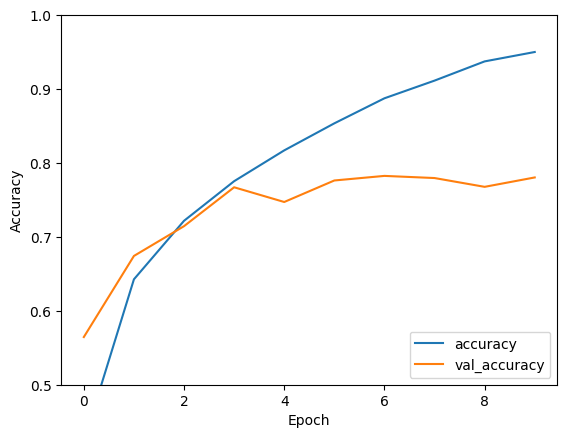

In [ ]:
# plotting accuracy over train and test data against
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5,1])
plt.legend(loc="lower right")

In [ ]:
# Evaluating the test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.9752 - accuracy: 0.7804 - 1s/epoch - 4ms/step
0.7803999781608582


**Making Prediction on Model**

In [ ]:
class_names = ["airplane", "automobile","bird","cat","deer", "dog","frog","horse","ship","truck"]

1/1 [==============================] - 0s 23ms/step
Original label is airplane and predicted label is airplane


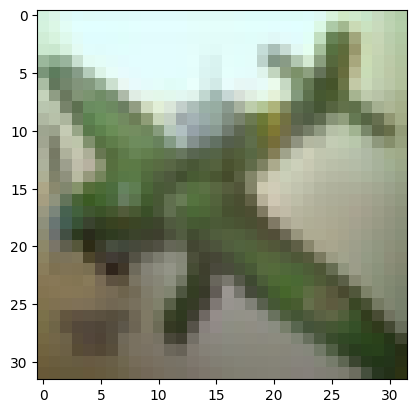

In [29]:
image_num = np.random.randint(0,50)

#display the image
plt.imshow(x_test[image_num])

# load the image in an array
n = np.array(x_test[image_num])

# reshape the image
p = n.reshape(1, 32,32, 3)

# pass in the network for prediction and save the predicted label
predicted_label = class_names[model.predict(p).argmax()]

# load the original label
original_label = class_names[y_test[image_num]]

# display the result
print("Original label is {} and predicted label is {}".format(original_label, predicted_label))
